### Basic Python Home Work 
<p> Topic  : Titanic
<p> Source : Kaggle.com
<p> Author : Bangun M Sagala
<p> Date   : November 2nd 2019

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv('csv/train.csv')
test = pd.read_csv('csv/test.csv')
gender=pd.read_csv('csv/gender_submission.csv')

In [5]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.shape

(891, 12)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Survived vs Passenger Sex 
<p> Create Pivot Table to Count total passenger survived or not based on Passenger Sex

In [4]:
titanic_survived_sex=pd.pivot_table(train,values=['PassengerId'],index=['Survived'],columns=['Sex'],aggfunc='count')

In [27]:
print(titanic_survived_sex)

         PassengerId     
Sex           female male
Survived                 
0                 81  468
1                233  109


In [1]:
titanic_survived_sex_cl = pd.DataFrame(titanic_survived_sex.to_records())

NameError: name 'pd' is not defined

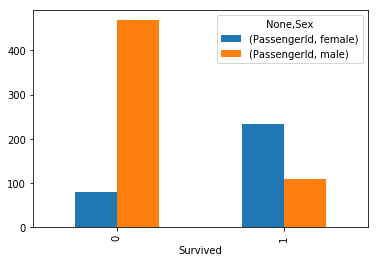

In [28]:
titanic_survived_sex.plot.bar()

#### Conclusion :
<p>According to the bar chart, where the Female passenger has the higher survive posibility than Male Passenger

## Survived vs Passenger Class
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Class in Titatic

In [33]:
titanic_survived_class=pd.pivot_table(train,values=['PassengerId'],index=['Survived'],columns=['Pclass'],aggfunc='count')
titanic_survived_class_clear = pd.DataFrame(titanic_survived_class.to_records())
titanic_survived_class_clear

,Survived,"('PassengerId', 1)","('PassengerId', 2)","('PassengerId', 3)"
0,0,80,97,372
1,1,136,87,119


<p> Change Column Name

In [34]:
titanic_survived_class_clear.columns=['Survived','PassClass1','PassClass2','PassClass3']
titanic_survived_class_clear

,Survived,PassClass1,PassClass2,PassClass3
0,0,80,97,372
1,1,136,87,119


In [15]:
labels = titanic_survived_class_clear['Survived']
class1 = titanic_survived_class_clear['PassClass1']
class2 = titanic_survived_class_clear['PassClass2']
class3 = titanic_survived_class_clear['PassClass3']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

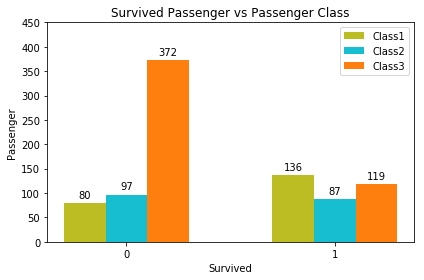

In [29]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-width, class1, width, label='Class1',color='tab:olive')
rects2 = ax.bar(x, class2, width, label='Class2',color='tab:cyan')
rects3 = ax.bar(x+width, class3, width, label='Class3',color='tab:orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Survived')
ax.set_title('Survived Passenger vs Passenger Class')
ax.set_ylim([0,450])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
fig.tight_layout()
plt.show()


#### Conclusion :
<p>According to the bar chart, where the passenger with lower class(1 is highest)  in Titanic the posibbility survive is decrease

## Survived vs Passenger Siblings / Spouse
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Connection with other Passenger (spouse or siblings) in Titatic

In [110]:
titanic_survived_con=pd.pivot_table(train,values=['PassengerId'],index=['Survived','Sex'],columns=['SibSp'],aggfunc='count')
titanic_survived_con

PassengerId                                 
SibSp                     0     1     2    3     4    5    8
Survived Sex                                                
0        female        37.0  26.0   3.0  7.0   4.0  1.0  3.0
         male         361.0  71.0  12.0  5.0  11.0  4.0  4.0
1        female       137.0  80.0  10.0  4.0   2.0  NaN  NaN
         male          73.0  32.0   3.0  NaN   1.0  NaN  NaN

In [111]:
titanic_survived_con_clear = pd.DataFrame(titanic_survived_con.to_records())
titanic_survived_con_clear

,Survived,Sex,"('PassengerId', 0)","('PassengerId', 1)","('PassengerId', 2)","('PassengerId', 3)","('PassengerId', 4)","('PassengerId', 5)","('PassengerId', 8)"
0,0,female,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,137.0,80.0,10.0,4.0,2.0,NaN,NaN
3,1,male,73.0,32.0,3.0,NaN,1.0,NaN,NaN


In [112]:
titanic_survived_con_clear.columns=['Survived','Sex','Alone','1Relatives','2Relatives','3Relatives','4Relatives','5Relatives','8Relatives']
titanic_survived_con_clear

,Survived,Sex,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,0,female,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,137.0,80.0,10.0,4.0,2.0,NaN,NaN
3,1,male,73.0,32.0,3.0,NaN,1.0,NaN,NaN


In [113]:
titanic_survived_con_clear=titanic_survived_con_clear.fillna(0)
titanic_survived_con_clear
titanic_survived_con_clear.insert(2,'Sex-Survived', titanic_survived_con_clear['Sex'].map(str)+'-'+titanic_survived_con_clear['Survived'].map(str))
titanic_survived_con_clear

,Survived,Sex,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,0,female,female-0,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,0,male,male-0,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,1,female,female-1,137.0,80.0,10.0,4.0,2.0,0.0,0.0
3,1,male,male-1,73.0,32.0,3.0,0.0,1.0,0.0,0.0


In [114]:
titanic_survived_con_clear.drop(columns=['Survived','Sex'],inplace=True)
titanic_survived_con_clear

,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,female-0,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,male-0,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,female-1,137.0,80.0,10.0,4.0,2.0,0.0,0.0
3,male-1,73.0,32.0,3.0,0.0,1.0,0.0,0.0


In [115]:
titanic_survived_con_clear

,Sex-Survived,Alone,1Relatives,2Relatives,3Relatives,4Relatives,5Relatives,8Relatives
0,female-0,37.0,26.0,3.0,7.0,4.0,1.0,3.0
1,male-0,361.0,71.0,12.0,5.0,11.0,4.0,4.0
2,female-1,137.0,80.0,10.0,4.0,2.0,0.0,0.0
3,male-1,73.0,32.0,3.0,0.0,1.0,0.0,0.0


In [117]:
labels = titanic_survived_con_clear['Sex-Survived']
class1 = titanic_survived_con_clear['Alone']
class2 = titanic_survived_con_clear['1Relatives']
class3 = titanic_survived_con_clear['2Relatives']
class4 = titanic_survived_con_clear['3Relatives']
class5 = titanic_survived_con_clear['4Relatives']
class6 = titanic_survived_con_clear['5Relatives']
class7 = titanic_survived_con_clear['8Relatives']
x = np.arange(len(labels))
width = 0.2  # the width of the bars

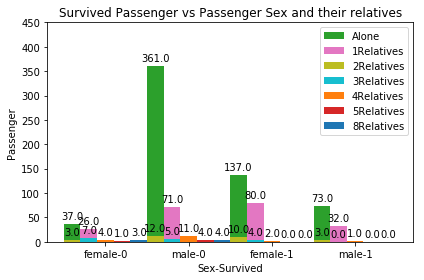

In [119]:
fig, ax = plt.subplots()
rects1 = ax.bar(x-2*width, class1, width, label='Alone',color='tab:green')
rects2 = ax.bar(x-width, class2, width, label='1Relatives',color='tab:pink')
rects3 = ax.bar(x-2*width, class3, width, label='2Relatives',color='tab:olive')
rects4 = ax.bar(x-width, class4, width, label='3Relatives',color='tab:cyan')
rects5 = ax.bar(x, class5, width, label='4Relatives',color='tab:orange')
rects6 = ax.bar(x+width, class6, width, label='5Relatives',color='tab:red')
rects7 = ax.bar(x+2*width, class7, width, label='8Relatives',color='tab:blue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Passenger')
ax.set_xlabel('Sex-Survived')
ax.set_title('Survived Passenger vs Passenger Sex and their relatives')
ax.set_ylim([0,450])
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)
autolabel(rects5)
autolabel(rects6)
autolabel(rects7)
fig.tight_layout()
plt.show()

## Survived vs Passenger Parent / Children
<p>Create Pivot Table to Count total passenger survived or not based on Passenger Connection with other Passenger (Parrent or Children) in Titatic

In [33]:
titanic_survived_par=pd.pivot_table(train,values=['PassengerId'],index=['Survived'],columns=['Parch'],aggfunc='count')

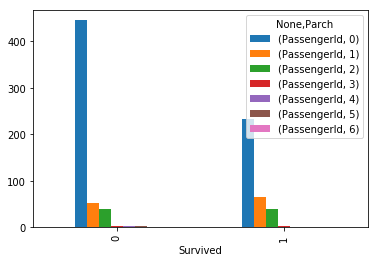

In [34]:
titanic_survived_par.plot.bar()

#### Conclusion :
<p>According to the bar chart, where the passenger has parent or children in Titanic the posibbility survive is decrease